In [ ]:
import pandas as pd

In [ ]:
# Creating a empty dict, where I will save all parameters required for test data transformation

saved_dict = {}

In [ ]:
# Reading datasets
dfs = []
for i in range(1,5):
    path = '/content/drive/MyDrive/UNSW/CSV Files/UNSW-NB15_{}.csv'  # There are 4 input csv files
    dfs.append(pd.read_csv(path.format(i), header = None))
all_data = pd.concat(dfs).reset_index(drop=True)  # Concat all to a single df

<ipython-input-3-f9c534c03c56>:5: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(path.format(i), header = None))
<ipython-input-3-f9c534c03c56>:5: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(path.format(i), header = None))


In [ ]:
# This csv file contains names of all the features
df_col = pd.read_csv('/content/drive/MyDrive/UNSW/CSV Files/NUSW-NB15_features.csv', encoding='ISO-8859-1')

In [ ]:
# Making column names lower case, removing spaces
df_col['Name'] = df_col['Name'].apply(lambda x: x.strip().replace(' ', '').lower())

In [ ]:
# Renaming our dataframe with proper column names
all_data.columns = df_col['Name']

In [ ]:
# Saving useful info, later this will be used to transform raw test data
saved_dict['columns'] = df_col['Name'][df_col['Name']!='label'].tolist()

In [ ]:
del df_col

In [ ]:
all_data.shape

(2540047, 49)

In [ ]:
all_data.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [ ]:
all_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  sload             float64
 15  dload             float64
 16  spkts             int64  
 17  dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  sjit          

In [ ]:
# attack_cat 열에서 NaN 값을 "Normal"로 대체
all_data['attack_cat'] = all_data['attack_cat'].fillna('Normal').str.strip()

In [ ]:
class_names  = all_data['attack_cat'].unique()

In [ ]:
class_names

array(['Normal', 'Exploits', 'Reconnaissance', 'DoS', 'Generic',
       'Shellcode', 'Fuzzers', 'Worms', 'Backdoors', 'Analysis',
       'Backdoor'], dtype=object)

## Data cleaning and pre-processing

In [ ]:
# Missing Data Handling Module

def myPreprocessor(dataframe, handling_method, target_label_name):
    df = dataframe
    method = handling_method
    label = target_label_name

    #importing libraries
    import numpy as np
    import pandas as pd
    from sklearn import preprocessing

    for i in range(df.shape[1]):
        n = df.iloc[:,i].isnull().sum()
        if n > 0:
            print("There is some missing values")
            print(df.iloc[:,i].name)
            if df.iloc[:,i].dtype == 'object':
                print('object')
                df.iloc[:,i]=df.iloc[:,i].fillna(df.iloc[:,i].mode()[0])
            else:
                print('numerical')

                if method == 'mean':
                    df.iloc[:,i]=df.iloc[:,i].fillna(df.iloc[:,i].mean())
                elif method == 'median':
                    df.iloc[:,i]=df.iloc[:,i].fillna(df.iloc[:,i].median())
                elif method == 'ffill':
                    df.iloc[:,i]=df.iloc[:,i].fillna(method = 'ffill')

# Label Encoder for converting categorical values to numerical values

    obj_features = []

    # Decide which categorical variables you want to use in model
    for col_name in df.columns:
        if df[col_name].dtypes == 'object':
            unique_cat = len(df[col_name].unique())
            print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))
            obj_features.append(col_name)

    label_encoder = preprocessing.LabelEncoder()

    k = df[obj_features].shape[1]

    for i in range(k):
        name=obj_features
        name[i]
        df[name[i]]= label_encoder.fit_transform(df[name[i]])


# Feature scaling - Normalization

    features_data=df.drop(label,axis=1)
    class_data=df[label]
    ###
    cols_name = features_data.columns

    minmax_scaler=preprocessing.MinMaxScaler()
    scaled =minmax_scaler.fit_transform(features_data)

    normalize_data = pd.DataFrame(scaled, columns = cols_name)

    return normalize_data, class_data, label_encoder

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, initializers
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from imblearn.over_sampling import SMOTE
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
def Remove_dump_values(data, cols):
    for col in cols:
        data[col] = np.where(data[col] == '-', np.nan, data[col])
    return data

In [ ]:
cols = all_data.columns
df = Remove_dump_values(all_data, cols)

In [ ]:
df

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132.0,164.0,31.0,...,0,3.0,7.0,1.0,3.0,1.0,1.0,1.0,Normal,0.0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528.0,304.0,31.0,...,0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,Normal,0.0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146.0,178.0,31.0,...,0,12.0,8.0,1.0,2.0,2.0,1.0,1.0,Normal,0.0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132.0,164.0,31.0,...,0,6.0,9.0,1.0,1.0,1.0,1.0,1.0,Normal,0.0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146.0,178.0,31.0,...,0,7.0,9.0,1.0,1.0,1.0,1.0,1.0,Normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320.0,1828.0,31.0,...,,1.0,2.0,3.0,3.0,1.0,1.0,3.0,Normal,0.0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456.0,346.0,31.0,...,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Normal,0.0
2540044,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802.0,2088.0,31.0,...,2,2.0,2.0,4.0,2.0,2.0,2.0,2.0,Normal,0.0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498.0,166054.0,31.0,...,,1.0,1.0,2.0,4.0,2.0,2.0,2.0,Normal,0.0


In [ ]:
# attack_cat 열에서 Backdoor 값을 Backdoors로 변경
df['attack_cat'] = df['attack_cat'].replace('Backdoor', 'Backdoors')

In [ ]:
df['attack_cat'].unique()

array(['Normal', 'Exploits', 'Reconnaissance', 'DoS', 'Generic',
       'Shellcode', 'Fuzzers', 'Worms', 'Backdoors', 'Analysis'],
      dtype=object)

In [ ]:
df.isnull().sum()

,0
Name,
srcip,0
sport,2
dstip,0
dsport,7
proto,0
state,0
dur,0
sbytes,0
dbytes,0


In [ ]:
df['ct_flw_http_mthd'] = df.ct_flw_http_mthd.fillna(value=0)

In [ ]:
df['is_ftp_login'] = (df.is_ftp_login.fillna(value=0)).astype(int)

In [ ]:
df.isnull().sum()

,0
Name,
srcip,0
sport,2
dstip,0
dsport,7
proto,0
state,0
dur,0
sbytes,0
dbytes,0


In [ ]:
df.drop(['sport', 'dsport', 'label','service', 'ct_ftp_cmd', 'srcip', 'dstip'], axis=1, inplace = True)

In [ ]:
df.isnull().sum()

,0
Name,
proto,0
state,0
dur,0
sbytes,0
dbytes,0
sttl,0
dttl,0
sloss,0
dloss,0


In [ ]:
x, y, label_encoder = myPreprocessor(df, 'mean', 'attack_cat')

Feature 'proto' has 135 unique categories
Feature 'state' has 16 unique categories
Feature 'attack_cat' has 10 unique categories


In [ ]:
# 각 인코딩된 값과 원래 클래스의 매핑 출력
for index, class_label in enumerate(label_encoder.classes_):
    print(f"Value {index}: {class_label}")


Value 0: Analysis
Value 1: Backdoors
Value 2: DoS
Value 3: Exploits
Value 4: Fuzzers
Value 5: Generic
Value 6: Normal
Value 7: Reconnaissance
Value 8: Shellcode
Value 9: Worms


In [ ]:
x

Name,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,...,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,0.895522,0.133333,1.200687e-07,0.000009,0.000011,0.121569,0.114173,0.000000,0.000000,8.357948e-05,...,0.0,0.000000,0.0,0.030303,0.090909,0.000000,0.030303,0.000000,0.000000,0.000000
1,0.895522,0.133333,4.112267e-06,0.000037,0.000021,0.121569,0.114173,0.000000,0.000000,1.464196e-05,...,0.0,0.000000,0.0,0.015152,0.045455,0.015152,0.030303,0.000000,0.000000,0.015152
2,0.895522,0.133333,1.273525e-07,0.000010,0.000012,0.121569,0.114173,0.000000,0.000000,8.715673e-05,...,0.0,0.000000,0.0,0.166667,0.106061,0.000000,0.015152,0.015152,0.000000,0.000000
3,0.895522,0.133333,1.375953e-07,0.000009,0.000011,0.121569,0.114173,0.000000,0.000000,7.293329e-05,...,0.0,0.000000,0.0,0.075758,0.121212,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.895522,0.133333,1.330429e-07,0.000010,0.000012,0.121569,0.114173,0.000000,0.000000,8.342890e-05,...,0.0,0.000000,0.0,0.090909,0.121212,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,0.850746,0.333333,9.936224e-06,0.000022,0.000125,0.121569,0.114173,0.000188,0.000363,4.085783e-06,...,0.0,0.000000,0.0,0.000000,0.015152,0.030303,0.030303,0.000000,0.000000,0.030303
2540043,0.850746,0.133333,4.154695e-05,0.000032,0.000024,0.121569,0.114173,0.000376,0.000363,1.460223e-06,...,0.0,0.000000,0.5,0.015152,0.015152,0.015152,0.015152,0.015152,0.016949,0.015152
2540044,0.850746,0.133333,7.209987e-04,0.000126,0.000142,0.121569,0.114173,0.001316,0.001634,3.682097e-07,...,0.0,0.000000,0.5,0.015152,0.015152,0.045455,0.015152,0.015152,0.016949,0.015152
2540045,0.850746,0.133333,2.504865e-04,0.000244,0.011329,0.121569,0.114173,0.000376,0.010350,2.086926e-06,...,0.0,0.055556,0.0,0.000000,0.000000,0.015152,0.045455,0.015152,0.016949,0.015152


In [ ]:
print(x.head())

Name     proto     state           dur    sbytes    dbytes      sttl  \
0     0.895522  0.133333  1.200687e-07  0.000009  0.000011  0.121569   
1     0.895522  0.133333  4.112267e-06  0.000037  0.000021  0.121569   
2     0.895522  0.133333  1.273525e-07  0.000010  0.000012  0.121569   
3     0.895522  0.133333  1.375953e-07  0.000009  0.000011  0.121569   
4     0.895522  0.133333  1.330429e-07  0.000010  0.000012  0.121569   

Name      dttl  sloss  dloss     sload  ...  ct_state_ttl  ct_flw_http_mthd  \
0     0.114173    0.0    0.0  0.000084  ...           0.0               0.0   
1     0.114173    0.0    0.0  0.000015  ...           0.0               0.0   
2     0.114173    0.0    0.0  0.000087  ...           0.0               0.0   
3     0.114173    0.0    0.0  0.000073  ...           0.0               0.0   
4     0.114173    0.0    0.0  0.000083  ...           0.0               0.0   

Name  is_ftp_login  ct_srv_src  ct_srv_dst  ct_dst_ltm  ct_src_ltm  \
0              0.0    

In [ ]:
y.value_counts()

,count
attack_cat,
6,2218764
5,215481
3,44525
4,24246
2,16353
7,13987
0,2677
1,2329
8,1511


## Data Visualization

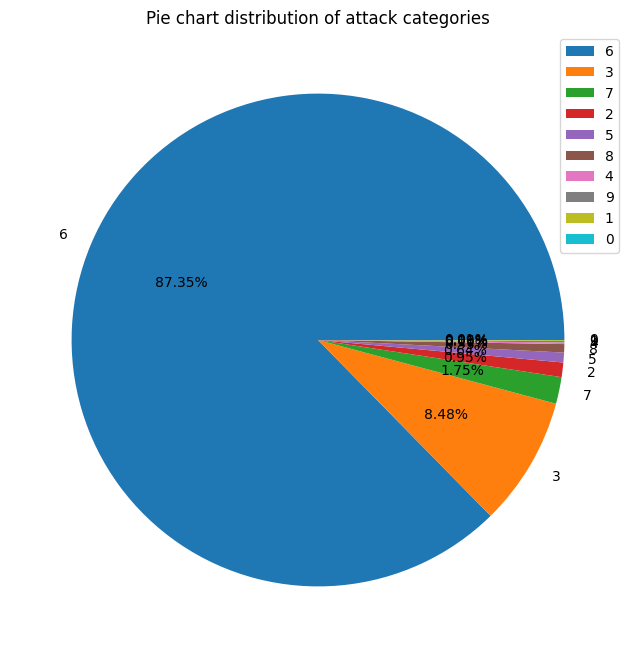

In [ ]:
plt.figure(figsize=(8,8))

# attack_cat의 값 비율에 따라 파이 차트 그리기
plt.pie(df['attack_cat'].value_counts(), labels=df['attack_cat'].unique(), autopct='%0.2f%%')

plt.title('Pie chart distribution of attack categories')
plt.legend(loc='best')
plt.show()

In [ ]:
x_array = np.array(x)
y_array = np.array(y)

In [ ]:
# from imblearn.over_sampling import SMOTE

# # SMOTE 오버샘플링 적용
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# x_resampled, y_resampled = smote.fit_resample(x_array, y_array)

# # 클래스 분포 확인
# from collections import Counter
# print("Before SMOTE: ", Counter(y_array))
# print("After SMOTE: ", Counter(y_resampled))


In [ ]:
# 데이터를 80:10:10 비율로 나누기
# 불균형 데이터를 레이블 비율에 맞게 나누기 위해 stratify 옵션 사용
# 1단계: 먼저 80% train, 20% test/val로 나누기
x_train, x_temp, y_train, y_temp = train_test_split(x_array, y_array, test_size=0.2, random_state=42, stratify=y_array)

# 2단계: 나머지 20%에서 50:50으로 다시 나누어 10% validation, 10% test로 나누기
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)

dict(zip(unique, counts))

{0: 2142,
 1: 1863,
 2: 13082,
 3: 35620,
 4: 19397,
 5: 172385,
 6: 1775011,
 7: 11189,
 8: 1209,
 9: 139}

In [ ]:
unique, counts = np.unique(y_test, return_counts=True)

dict(zip(unique, counts))

{0: 267,
 1: 233,
 2: 1635,
 3: 4453,
 4: 2425,
 5: 21548,
 6: 221877,
 7: 1399,
 8: 151,
 9: 17}

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import SMOTE
# from imblearn.combine import SMOTEENN
# from imblearn.over_sampling import ADASYN
# from collections import Counter

# # Step 1: 언더샘플링
# # 가장 많은 클래스(7)를 두 번째로 많은 클래스(6)의 수에 맞추기
# undersample = RandomUnderSampler(sampling_strategy={7: 172385}, random_state=42)
# x_under, y_under = undersample.fit_resample(x_train, y_train)


# # 언더샘플링 후 클래스 분포 확인
# print("After Undersampling: ", Counter(y_under))


# # 비정상 데이터의 개수를 전체 데이터의 약 10%로 맞춘다.
# # adasyn = ADASYN(sampling_strategy={0: 20000, 1: 2000, 2: 1000, 3: 15000, 4: 40000, 5: 25000, 6: 200000, 8: 16000, 9: 2000, 10: 500}, random_state=42)
# # X_resampled, y_resampled = adasyn.fit_resample(x_under, y_under)
# # 각 클래스의 샘플 수를 기존 수 이상으로 설정
# smote = SMOTE(sampling_strategy={
#     0: 2200,
#     1: 1500,
#     2: 500,
#     3: 14000,
#     4: 40000,
#     5: 20000,
#     # 6: 175000,
#     # 7: 180000,
#     8: 12000,
#     9: 1300,
#     10: 200
# }, random_state=42)

# # 데이터 오버샘플링
# X_resampled, y_resampled = smote.fit_resample(x_under, y_under)

# print("After ADASYN Over-sampling:", Counter(y_resampled))


# x_train, y_train = X_resampled, y_resampled

# # # Step 2: 오버샘플링 (SMOTE)
# # # 언더샘플링 후 오버샘플링을 사용하여 나머지 클래스의 비율을 맞춤
# # smote = SMOTE(sampling_strategy='auto', random_state=42)
# # x_resampled, y_resampled = smote.fit_resample(x_under, y_under)

# # # 오버샘플링 후 클래스 분포 확인
# # print("After SMOTE: ", Counter(y_resampled))

# # x_train, y_train = x_resampled, y_resampled


ValueError: With under-sampling methods, the number of samples in a class should be less or equal to the original number of samples. Originally, there is 11189 samples and 172385 samples are asked.

In [ ]:
x_train =np.expand_dims(x_train, axis =2)
x_test =np.expand_dims(x_test, axis =2)
x_val =np.expand_dims(x_val, axis =2)

In [ ]:
print(f'Training set size: {x_train.shape[0]} samples')
print(f'Validation set size: {x_val.shape[0]} samples')
print(f'Test set size: {x_test.shape[0]} samples')

Training set size: 2032037 samples
Validation set size: 254005 samples
Test set size: 254005 samples


In [ ]:
x_train.shape

(2032037, 41, 1)

## Model

In [ ]:
# cnn = models.Sequential([
#     layers.Conv1D(32, 3, activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(41, 1)),
#     layers.Conv1D(32, 3, activation='relu', padding='same', kernel_initializer='he_uniform'),
#     layers.MaxPooling1D(pool_size=2, strides=2),

#     layers.Dropout(0.2),
#     layers.BatchNormalization(),

#     layers.Conv1D(64, 3, activation='relu', padding='same', kernel_initializer='he_uniform'),
#     layers.Conv1D(64, 3, activation='relu', padding='same', kernel_initializer='he_uniform'),
#     layers.MaxPooling1D(pool_size=2, strides=2),
#     layers.Dropout(0.2),
#     layers.BatchNormalization(),

#     layers.Flatten(),
#     layers.Dense(32, activation='relu'),

#     # 다중 클래스 분류를 위한 출력층: 노드 10개, softmax 활성화 함수
#     layers.Dense(10, activation='softmax'),  # 10개의 클래스를 예측
# ])

# cnn.summary()

In [ ]:
# cnn = models.Sequential([
#     # 첫 번째 Conv 블록
#     layers.Conv1D(64, 3, activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(41, 1)),
#     layers.Conv1D(64, 3, activation='relu', padding='same', kernel_initializer='he_uniform'),
#     layers.MaxPooling1D(pool_size=2, strides=2),
#     layers.Dropout(0.3),
#     layers.BatchNormalization(),

#     # 두 번째 Conv 블록
#     layers.Conv1D(128, 3, activation='relu', padding='same', kernel_initializer='he_uniform'),
#     layers.Conv1D(128, 3, activation='relu', padding='same', kernel_initializer='he_uniform'),
#     layers.MaxPooling1D(pool_size=2, strides=2),
#     layers.Dropout(0.3),
#     layers.BatchNormalization(),

#     # 세 번째 Conv 블록
#     layers.Conv1D(256, 3, activation='relu', padding='same', kernel_initializer='he_uniform'),
#     layers.Conv1D(256, 3, activation='relu', padding='same', kernel_initializer='he_uniform'),
#     layers.MaxPooling1D(pool_size=2, strides=2),
#     layers.Dropout(0.4),
#     layers.BatchNormalization(),

#     # 네 번째 Conv 블록 (추가된 깊이)
#     layers.Conv1D(512, 3, activation='relu', padding='same', kernel_initializer='he_uniform'),
#     layers.Conv1D(512, 3, activation='relu', padding='same', kernel_initializer='he_uniform'),
#     layers.MaxPooling1D(pool_size=2, strides=2),
#     layers.Dropout(0.4),
#     layers.BatchNormalization(),

#     # Flattening 및 Dense 층
#     layers.Flatten(),
#     layers.Dense(256, activation='relu'),
#     layers.Dropout(0.5),  # 깊은 네트워크에서 과적합 방지를 위해 드롭아웃 비율 증가
#     layers.BatchNormalization(),

#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.5),  # 과적합 방지를 위해 드롭아웃 추가

#     # 다중 클래스 분류를 위한 출력층: 노드 10개, softmax 활성화 함수
#     layers.Dense(10, activation='softmax'),  # 10개의 클래스를 예측
# ])

# cnn.summary()


In [ ]:
# from tensorflow.keras import layers, models
# import tensorflow as tf

# # Attention Layer 정의
# class AttentionLayer(layers.Layer):
#     def __init__(self, **kwargs):
#         super(AttentionLayer, self).__init__(**kwargs)

#     def build(self, input_shape):
#         self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1]),
#                                  initializer='glorot_uniform', trainable=True)
#         self.b = self.add_weight(shape=(input_shape[-1],),
#                                  initializer='zeros', trainable=True)
#         self.u = self.add_weight(shape=(input_shape[-1],),
#                                  initializer='glorot_uniform', trainable=True)
#         super(AttentionLayer, self).build(input_shape)

#     def call(self, inputs):
#         # Score 계산: tanh(W * h + b)
#         score = tf.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)
#         # Score에서 가중치로 변환: softmax
#         attention_weights = tf.nn.softmax(tf.tensordot(score, self.u, axes=1), axis=1)
#         # Attention 적용
#         weighted_input = inputs * tf.expand_dims(attention_weights, -1)
#         return tf.reduce_sum(weighted_input, axis=1)

# # CNN-LSTM 모델 정의 (Attention 메커니즘 추가)
# cnn_lstm_model = models.Sequential([
#     # CNN 블록
#     layers.Conv1D(64, 3, activation='relu', padding='same', input_shape=(41, 1)),
#     layers.Conv1D(64, 3, activation='relu', padding='same'),
#     layers.MaxPooling1D(pool_size=2),
#     layers.Dropout(0.3),

#     layers.Conv1D(128, 3, activation='relu', padding='same'),
#     layers.Conv1D(128, 3, activation='relu', padding='same'),
#     layers.MaxPooling1D(pool_size=2),
#     layers.Dropout(0.3),

#     # LSTM 블록
#     layers.LSTM(128, return_sequences=True),
#     layers.LSTM(128, return_sequences=True),
#     layers.Dropout(0.4),
#     layers.BatchNormalization(),

#     # Attention Layer 적용
#     AttentionLayer(),

#     # Dense 레이어 추가
#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.4),

#     # 다중 클래스 분류를 위한 출력층
#     layers.Dense(10, activation='softmax'),
# ])

# cnn_lstm_model.summary()


In [ ]:
# from tensorflow.keras import layers, models
# import tensorflow as tf

# # Attention Layer 정의
# class AttentionLayer(layers.Layer):
#     def __init__(self, **kwargs):
#         super(AttentionLayer, self).__init__(**kwargs)

#     def build(self, input_shape):
#         self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1]),
#                                  initializer='glorot_uniform', trainable=True)
#         self.b = self.add_weight(shape=(input_shape[-1],),
#                                  initializer='zeros', trainable=True)
#         self.u = self.add_weight(shape=(input_shape[-1],),
#                                  initializer='glorot_uniform', trainable=True)
#         super(AttentionLayer, self).build(input_shape)

#     def call(self, inputs):
#         # Score 계산: tanh(W * h + b)
#         score = tf.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)
#         # Score에서 가중치로 변환: softmax
#         attention_weights = tf.nn.softmax(tf.tensordot(score, self.u, axes=1), axis=1)
#         # Attention 적용
#         weighted_input = inputs * tf.expand_dims(attention_weights, -1)
#         return tf.reduce_sum(weighted_input, axis=1)

# # 더 깊고 복잡한 CNN-LSTM 모델 정의 (Attention 메커니즘 포함)
# cnn_lstm_model = models.Sequential([
#     # 첫 번째 CNN 블록
#     layers.Conv1D(64, 3, activation='relu', padding='same', input_shape=(41, 1)),
#     layers.Conv1D(64, 3, activation='relu', padding='same'),
#     layers.MaxPooling1D(pool_size=2),
#     layers.Dropout(0.3),
#     layers.BatchNormalization(),

#     # 두 번째 CNN 블록
#     layers.Conv1D(128, 3, activation='relu', padding='same'),
#     layers.Conv1D(128, 3, activation='relu', padding='same'),
#     layers.MaxPooling1D(pool_size=2),
#     layers.Dropout(0.3),
#     layers.BatchNormalization(),

#     # 세 번째 CNN 블록
#     layers.Conv1D(256, 3, activation='relu', padding='same'),
#     layers.Conv1D(256, 3, activation='relu', padding='same'),
#     layers.MaxPooling1D(pool_size=2),
#     layers.Dropout(0.4),
#     layers.BatchNormalization(),

#     # 네 번째 CNN 블록
#     layers.Conv1D(512, 3, activation='relu', padding='same'),
#     layers.Conv1D(512, 3, activation='relu', padding='same'),
#     layers.MaxPooling1D(pool_size=2),
#     layers.Dropout(0.4),
#     layers.BatchNormalization(),

#     # LSTM 블록 (더 깊게 쌓기)
#     layers.LSTM(256, return_sequences=True),
#     layers.LSTM(256, return_sequences=True),
#     layers.LSTM(128, return_sequences=True),
#     layers.Dropout(0.5),
#     layers.BatchNormalization(),

#     # Attention Layer 적용
#     AttentionLayer(),

#     # Dense 레이어 추가
#     layers.Dense(256, activation='relu'),
#     layers.Dropout(0.5),
#     layers.BatchNormalization(),

#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.5),

#     # 다중 클래스 분류를 위한 출력층
#     layers.Dense(10, activation='softmax'),
# ])

# cnn_lstm_model.summary()


In [ ]:
# 모델 정의
model = models.Sequential([
    layers.Conv1D(128, 3, activation='relu', padding='same', input_shape=(41, 1)),
    layers.Conv1D(128, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(pool_size=2),
    layers.Dropout(0.3),

    layers.Conv1D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(pool_size=2),
    layers.Dropout(0.3),

    layers.LSTM(128, return_sequences=True),
    layers.LSTM(64),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])
# 모델 컴파일
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 41, 128)             │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 41, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 20, 64)              │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 10, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,266 (907.29 KB)

 Trainable params: 232,266 (907.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# # 수정된 Nadam 옵티마이저 (schedule_decay 제거)
# nadam = optimizers.Nadam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

# # 모델 컴파일
# cnn_lstm_model.compile(optimizer="nadam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np

n_epochs = 15
batch_size = 1024
verbosity = 1

# 결과 저장을 위한 리스트 초기화
model_history = []
clr = []
cm_all = []
acc_all = []
loss_all = []
recall_all = []
precision_all = []
f1_all = []

# Reduce learning rate callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)


In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)


In [ ]:
# 학습 시작
print('------------------------------------------------------------------------')
print('Training the model...')

# 모델 훈련
with tf.device('/device:GPU:0'):
  history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=n_epochs,
                    verbose=verbosity,
                    validation_data=(x_val, y_val),
                    class_weight=dict(enumerate(class_weights)),
                    callbacks=[reduce_lr])

# 테스트 데이터로 성능 평가
scores = model.evaluate(x_test, y_test, verbose=0)
print(f'\nTest Score: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1] * 100} %')

# 예측 및 성능 측정
y_preds = model.predict(x_test)
y_preds1 = np.argmax(y_preds, axis=1)  # 확률이 가장 높은 클래스 선택

class_names = label_encoder.classes_

# 분류 보고서 및 혼동 행렬 계산
clr = classification_report(y_test, y_preds1, target_names=class_names)
cm = confusion_matrix(y_test, y_preds1)
accuracy = accuracy_score(y_test, y_preds1)
recall = recall_score(y_test, y_preds1, average='weighted')
precision = precision_score(y_test, y_preds1, average='weighted')
f1 = f1_score(y_test, y_preds1, average='weighted')

# 결과 저장
model_history.append(history)
cm_all.append(cm)
acc_all.append(accuracy * 100)
loss_all.append(scores[0])
recall_all.append(recall)
precision_all.append(precision)
f1_all.append(f1)

# 결과 출력
print(f'Confusion Matrix:\n{cm}')
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')

------------------------------------------------------------------------
Training the model...
Epoch 1/15
1985/1985 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 0.5864 - loss: 2.0725 - val_accuracy: 0.9347 - val_loss: 0.2309 - learning_rate: 0.0010
Epoch 2/15
1985/1985 ━━━━━━━━━━━━━━━━━━━━ 77s 23ms/step - accuracy: 0.9424 - loss: 1.6078 - val_accuracy: 0.9442 - val_loss: 0.2035 - learning_rate: 0.0010
Epoch 3/15
1985/1985 ━━━━━━━━━━━━━━━━━━━━ 81s 23ms/step - accuracy: 0.9448 - loss: 1.4112 - val_accuracy: 0.9510 - val_loss: 0.1887 - learning_rate: 0.0010
Epoch 4/15
1985/1985 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.9494 - loss: 1.3152 - val_accuracy: 0.9582 - val_loss: 0.1473 - learning_rate: 0.0010
Epoch 5/15
1985/1985 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.9545 - loss: 1.2392 - val_accuracy: 0.9594 - val_loss: 0.1503 - learning_rate: 0.0010
Epoch 6/15
1985/1985 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.9571 - loss: 1.1199 - val_accuracy: 0.9598 - val_loss: 

In [ ]:
# 테스트 데이터셋의 예측값 출력
print("Predicted classes for test data:")
print(y_preds1)  # 예측된 클래스 레이블

print("\nActual classes for test data:")
print(y_test)  # 실제 클래스 레이블

# 예측값과 실제값을 비교한 DataFrame 생성
import pandas as pd
result_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_preds1
})

print("\nComparison of actual and predicted classes:")
print(result_df.head(20))  # 상위 20개 비교


Predicted classes for test data:
[6 6 6 ... 6 6 5]

Actual classes for test data:
[6 6 6 ... 6 6 5]

Comparison of actual and predicted classes:
    Actual  Predicted
0        6          6
1        6          6
2        6          6
3        7          7
4        6          6
5        6          6
6        6          6
7        6          6
8        6          6
9        6          6
10       6          6
11       6          6
12       6          6
13       6          6
14       6          6
15       6          6
16       6          6
17       6          6
18       6          6
19       6          6


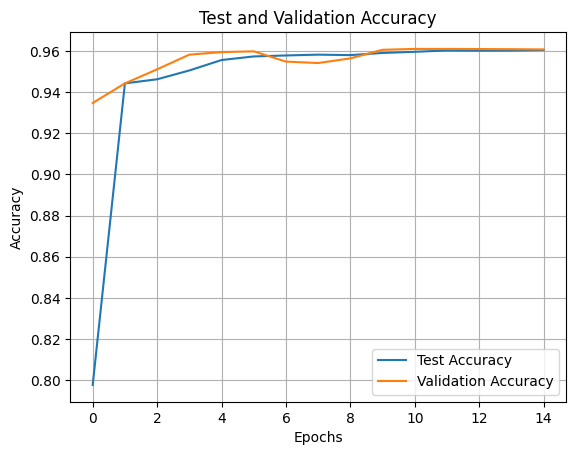

In [ ]:
# 훈련 및 검증 정확도 시각화
plt.plot(history.history['accuracy'], label='Test Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Test and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()